[View in Colaboratory](https://colab.research.google.com/github/plaban1981/Keras-Classification-Model/blob/master/CIFAR10_Imgae_Classification_Keras.ipynb)

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout
from keras.datasets import cifar10

In [105]:
input_shape=(32,32,3)
model = Sequential()
#build Model 32 layer maxpooling layer with 3x3 dimension
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
#maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
#maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))


#add the flatten layer so that it can be fed to the dense layer
model.add(Flatten())
#add Dense layer-2 fully connected layer
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))

#add output layer
model.add(Dense(10,activation='softmax'))

#sumarize the mosel
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 8, 8, 64)          0         
__________

In [8]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

NameError: ignored

In [120]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [0]:
from keras.utils import np_utils
#one hot encoding of target labels
num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

In [123]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


In [0]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])


In [125]:
batch_size = 128
epochs = 12
model.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/12
50000/50000 [==============================] - 320s 6ms/step - loss: 14.4835 - acc: 0.1011 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/12
50000/50000 [==============================] - 317s 6ms/step - loss: 11.3735 - acc: 0.1176 - val_loss: 2.0242 - val_acc: 0.2792
Epoch 3/12
50000/50000 [==============================] - 316s 6ms/step - loss: 1.6932 - acc: 0.3872 - val_loss: 1.3582 - val_acc: 0.4950
Epoch 4/12
50000/50000 [==============================] - 316s 6ms/step - loss: 1.3180 - acc: 0.5353 - val_loss: 1.4410 - val_acc: 0.5083
Epoch 5/12
50000/50000 [==============================] - 316s 6ms/step - loss: 1.1150 - acc: 0.6113 - val_loss: 1.0681 - val_acc: 0.6323
Epoch 6/12
50000/50000 [==============================] - 316s 6ms/step - loss: 0.9737 - acc: 0.6621 - val_loss: 0.9496 - val_acc: 0.6668
Epoch 7/12
50000/50000 [==============================] - 316s 6ms/step - loss: 0.8662 - acc: 0.7025 - val_loss: 1.0673

In [127]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.8823433554649353
Test accuracy: 0.7228


In [128]:
predictions = model.predict(X_test)
print('First prediction:', predictions[0])

First prediction: [4.9022434e-05 1.7996866e-04 1.3879653e-03 7.7531892e-01 2.2633019e-05
 1.1083372e-01 3.7628502e-02 2.2314749e-05 7.4377343e-02 1.7971979e-04]


In [129]:
predictions.shape

(10000, 10)

In [6]:
import numpy as np
np.argmax(y_test[0])

NameError: ignored

In [7]:
np.argmax(predictions[0])

NameError: ignored

In [132]:
batch_size = 128
epochs = 15
model.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 316s 6ms/step - loss: 0.5036 - acc: 0.8273 - val_loss: 0.8001 - val_acc: 0.7470
Epoch 2/15
50000/50000 [==============================] - 316s 6ms/step - loss: 0.4612 - acc: 0.8435 - val_loss: 0.9176 - val_acc: 0.7210
Epoch 3/15
50000/50000 [==============================] - 316s 6ms/step - loss: 0.4268 - acc: 0.8537 - val_loss: 0.8519 - val_acc: 0.7483
Epoch 4/15
50000/50000 [==============================] - 316s 6ms/step - loss: 0.3895 - acc: 0.8681 - val_loss: 1.0281 - val_acc: 0.7415
Epoch 5/15
50000/50000 [==============================] - 316s 6ms/step - loss: 0.3721 - acc: 0.8746 - val_loss: 0.8740 - val_acc: 0.7648
Epoch 6/15
50000/50000 [==============================] - 316s 6ms/step - loss: 0.3431 - acc: 0.8852 - val_loss: 0.9238 - val_acc: 0.7517
Epoch 7/15
50000/50000 [==============================] - 315s 6ms/step - loss: 0.3219 - acc: 0.8935 - val_loss: 1.0231 - 

In [133]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 1.3959190618991852
Test accuracy: 0.7103


In [9]:
predictions = model.predict(X_test,verbose=2)

NameError: ignored

In [0]:
p = np.argmax(predictions,axis=1) #retrieving the position of the higest probability value using argmax numpy function

In [144]:
p[0]

3

In [4]:
y_train

NameError: ignored

NameError: ignored

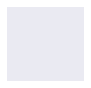

In [3]:
# Print figure with 10 random images from each
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(8,3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = X_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::],(1,2,0))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()